Данные взяты с https://archive.ics.uci.edu/ml/datasets/Wine . В данных содержатся 13 переменных, которые показывают химический состав вина, и три класса, которые являются сортами винограда для производства вин (как я понял). 
Рассмотрены только признаки "alcohol" и "ash"

In [232]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data.txt')

# рассмотрим случай двух классов, к качестве признаков возьмем alcohol и ash
reduced = data[data['class']  <= 2]
X = reduced.as_matrix(columns=['alcohol', 'ash'])
y = label_binarize(reduced['class'].values, [1, 2])[:,0]



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


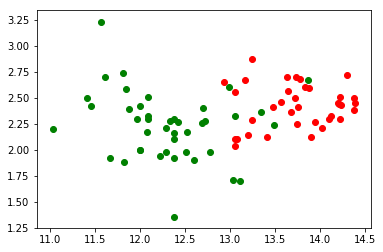

In [233]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# разделяем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

colors = ['red', 'green', 'blue']

# отмечаем точки и красим по классам
def plot_points(xy, labels):
    for i, label in enumerate(set(labels)):
        points = np.array([xy[j,:] for j in range(len(xy)) if labels[j] == label])
        color = colors[i % len(colors)]
        plt.scatter(points[:,0], points[:,1], color=color)

plot_points(X_train, y_train)

$$
h_\theta(x) = \frac{1}{1 + e^{ \theta^Tx}} - sigmoid
$$
$$
J(\theta) =-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i})) - cost-function
$$
$$
\frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i - gradient
$$


In [234]:
import numpy as np

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def cost(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]
    
    sgm = sigmoid(X.dot(theta))
    pos = np.multiply(-y, np.log(sgm))
    neg = np.multiply((1 - y), np.log(1 - sgm))
    
    return np.sum(pos - neg) / (len(X))

def gradient(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]
    
    error = sigmoid(X.dot(theta)) - y
    return X.T.dot(error) / len(X)

In [235]:
from scipy.optimize import fmin_tnc

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    result = fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y)) # минимизируем cost
    
    return result[0]

theta = train(X_train, y_train)
print(theta)

[71.69693066 -5.0151202  -2.61960046]


In [236]:
from sklearn.metrics import accuracy_score

def predict(X, theta):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    return (sigmoid(X * np.matrix(theta).T) >= 0.5).astype(int)

predictions = predict(X_test, theta)

print('Точность:', accuracy_score(y_test, predictions))

Точность: 0.9615384615384616


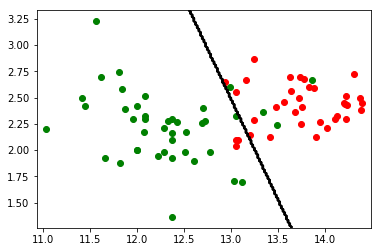

In [237]:
from matplotlib import cm

def plot_boundary(X, pred):
    
    x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
    y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
    
    xs, ys = np.meshgrid( 
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    xys = np.column_stack([xs.ravel(), ys.ravel()])
    zs = pred(xys).reshape(xs.shape)


    plt.contour(xs, ys, zs, colors='black')
        
plot_points(X_train, y_train)
plot_boundary(X_train, lambda x: predict(x, theta))

Точность: 0.9423076923076923


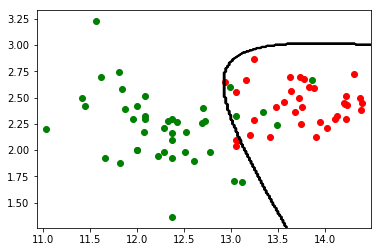

In [238]:
# добавим признаки - произведения исходных признаков, и посмотрим, что изменилось
def transform_x(x):
    return [x[0], x[1], x[0] ** 2, x[1] ** 2, x[0] * x[1]]

def transform(X):
    return np.apply_along_axis(transform_x, 1, X) # применяем transform_x по строкам X

X_train2 = transform(X_train)
X_test2 = transform(X_test)
#print(X_train2)
theta2 = train(X_train2, y_train)

plot_points(X_train2, y_train)
plot_boundary(X_train2, lambda x: predict(transform(x), theta2))

predictions = predict(X_test2, theta2)
print('Точность:', accuracy_score(y_test, predictions))

После нескольких прогонов заметно, что линейное разделение работает лучше, чем добавление квадратичных зависимостей к признакам.